## Question 1

The electric field generated by an infinitesimally thin spherical shell of charge with radius $R$ at position $z$ is given gy the integral
\begin{equation*}
E_z = \frac{2\pi R^2\sigma}{4\pi\epsilon_0}\int_0^\pi\frac{(z-R\cos(\theta))\sin(\theta)}{(R^2+z^2-2Rz\cos(\theta))^{3/2}}d\theta,
\end{equation*}

which is taken from problem 2.7 of Griffiths' E&M. For simplicity and neatness, let $R = \sigma = \epsilon_0 = 1$, and remove all the constants. We are left with:

\begin{equation*}
E_z = \int_0^\pi\frac{(z-\cos(\theta))\sin(\theta)}{(1+z^2-2z\cos(\theta))^{3/2}}d\theta.
\end{equation*} 

Now let $u = \cos(\theta)$, then $du = -\sin(\theta)$, and Equation (1) is what we need to solve

\begin{equation}
E_z = \int_{-1}^{1}\frac{z-u}{(1+z^2-2zu)^{3/2}}du.
\end{equation} 

In [1]:
# using scipy.integrate.quad
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 120

# defining the function to integrate
def func(u,z):
    return (z - u) / (1 +z**2 -2*z*u)**(3/2)

# bounds of integration
x = [-1,1]
# position in space
z = np.linspace(0, 2, 301)

# getting the values of the integral at all z using scipy.integrate.quad
quad_field = []
for i in z:
    quad_field.append(integrate.quad(func, x[0], x[-1], args = i)[0])

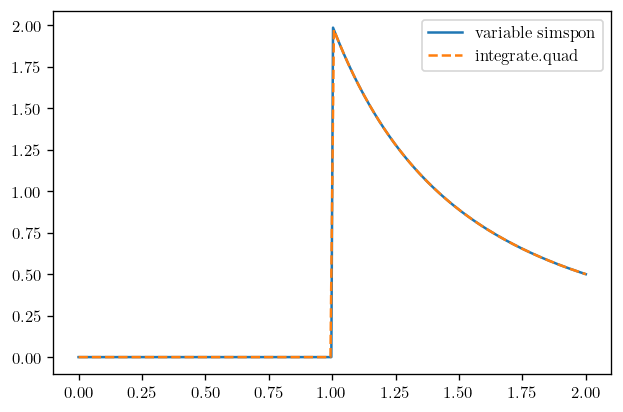

In [2]:
# using variable step size simpson from class

def integrate(fun,a,b,tol):
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    y=fun(x,i)
    # simpsons rule
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate(fun,a,mid,tol/2)
        int2=integrate(fun,mid,b,tol/2)
        return int1+int2

# the entire kernel crashes if z = R
# so choose some z1 that does not include z = R
z1 = np.linspace(0, 2, 300)

# call the integrator for all values of z
simpson_field = []
for i in z1: 
    def y(u, i):
        return (i - u) / (1 +i**2 -2*i*u)**(3/2)

    simpson_field.append(integrate(y, x[0], x[1], 1e-6))

plt.plot(z1, simpson_field, label = 'variable simspon')
plt.plot(z, quad_field, '--', label = 'integrate.quad')
plt.legend(loc= 'best')
plt.show()


There is a singularity in the integral at $z = R$, which is $R=1$ in this case. On one hand, scipy.integrate.quad does not care at all about the singularity, since it ran perfectly even when I included $z = 1$. On the other hand, the variable step size integrator completely crashes the kernel when it tries to handle $z=1$. I cannot run anything else until I restart the kernel. To avoid this, I just decided to choose an a range of values of $z$ that did not included 1 (but very close to 1). This worked, and gave pretty much the same result as scipy.intergrate.quad.